
    Each image in the data set contains multiple text-mined labels identifying 14 different pathological conditions.
    These in turn can be used by physicians to diagnose 8 different diseases.
    We will use this data to develop a single model that will provide binary classification predictions for each of the 14 labeled pathologies.
    In other words it will predict 'positive' or 'negative' for each of the pathologies.

You can download the entire dataset for free here.

    We have provided a ~1000 image subset of the images for you.
    These can be accessed in the folder path stored in the IMAGE_DIR variable.

The dataset includes a CSV file that provides the labels for each X-ray.

To make your job a bit easier, we have processed the labels for our small sample and generated three new files to get you started. These three files are:

    nih/train-small.csv: 875 images from our dataset to be used for training.
    nih/valid-small.csv: 109 images from our dataset to be used for validation.
    nih/test.csv: 420 images from our dataset to be used for testing.

This dataset has been annotated by consensus among four different radiologists for 5 of our 14 pathologies:

    Consolidation
    Edema
    Effusion
    Cardiomegaly
    Atelectasis


In [1]:
#!pip install tensorflow
#!pip uninstall tensorflow keras -y
#!pip install tensorflow

import tensorflow
print(tensorflow)
print(tensorflow.__file__)


2026-01-13 16:24:27.724992: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<module 'tensorflow' from '/home/marcos/.local/lib/python3.10/site-packages/tensorflow/__init__.py'>
/home/marcos/.local/lib/python3.10/site-packages/tensorflow/__init__.py


In [2]:

import tensorflow as tf



In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:

# later -> reuse from the project

from pathlib import Path
import os

def get_data_root() -> Path:
    try:
        return Path(os.environ["DATA_ROOT"]).resolve()
    except KeyError:
        raise RuntimeError(
            "DATA_ROOT is not set. "
            "Set it via environment variable."
        )




print(get_data_root())


RuntimeError: DATA_ROOT is not set. Set it via environment variable.

In [10]:
#DATA_ROOT = get_data_root()

DATA_ROOT="/home/marcos/Escritorio/AI-prod/DeepChest/data/nih/" # sin /


IMAGE_DIR = DATA_ROOT+"images-small/"
TRAIN_PATH = DATA_ROOT+"train-small.csv"
VALID_PATH = DATA_ROOT+"valid-small.csv"
TEST_PATH = DATA_ROOT+"test.csv"

"""
IMAGE_DIR = DATA_ROOT/"images-small/"
TRAIN_PATH = DATA_ROOT/ "train-small.csv"
VALID_PATH = DATA_ROOT/ "valid-small.csv"
TEST_PATH = DATA_ROOT/ "test.csv"
"""

'\nIMAGE_DIR = DATA_ROOT/"images-small/"\nTRAIN_PATH = DATA_ROOT/ "train-small.csv"\nVALID_PATH = DATA_ROOT/ "valid-small.csv"\nTEST_PATH = DATA_ROOT/ "test.csv"\n'

In [11]:
def load_data():
    train_df = pd.read_csv(TRAIN_PATH)
    valid_df = pd.read_csv(VALID_PATH)
    test_df = pd.read_csv(TEST_PATH)
    return train_df, valid_df, test_df




labels = ['Cardiomegaly', 
          'Emphysema', 
          'Effusion', 
          'Hernia', 
          'Infiltration', 
          'Mass', 
          'Nodule', 
          'Atelectasis',
          'Pneumothorax',
          'Pleural_Thickening', 
          'Pneumonia', 
          'Fibrosis', 
          'Edema', 
          'Consolidation']


In [12]:
train_df, val_df, test_df = load_data()

In [13]:
train_df.shape, val_df.shape, test_df.shape

((1000, 16), (200, 16), (420, 16))

In [14]:
train_df.head()

,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [15]:
train_df.columns

Index(['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'],
      dtype='object')

In [16]:
# we have several targets, 14, they can be 0 or 1 then i have a patientId adn the image



# prevent data leakage

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

In [18]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [19]:
# labels will be this but deleting Image and PatientId (and others in case i dont want all)

In [20]:
# Remove unnecesary elements
columns.remove('Image')
columns.remove('PatientId')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 14 columns of labels for these conditions: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [21]:
for col, count in train_df[columns].sum().items():
    print(f"The class {col} has {count} samples")


The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


In [22]:
def get_labels(df):
    columns = list(df.keys())
    columns.remove('Image')
    columns.remove('PatientId')
    return columns

labels = get_labels(train_df)
labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

Display Random Images


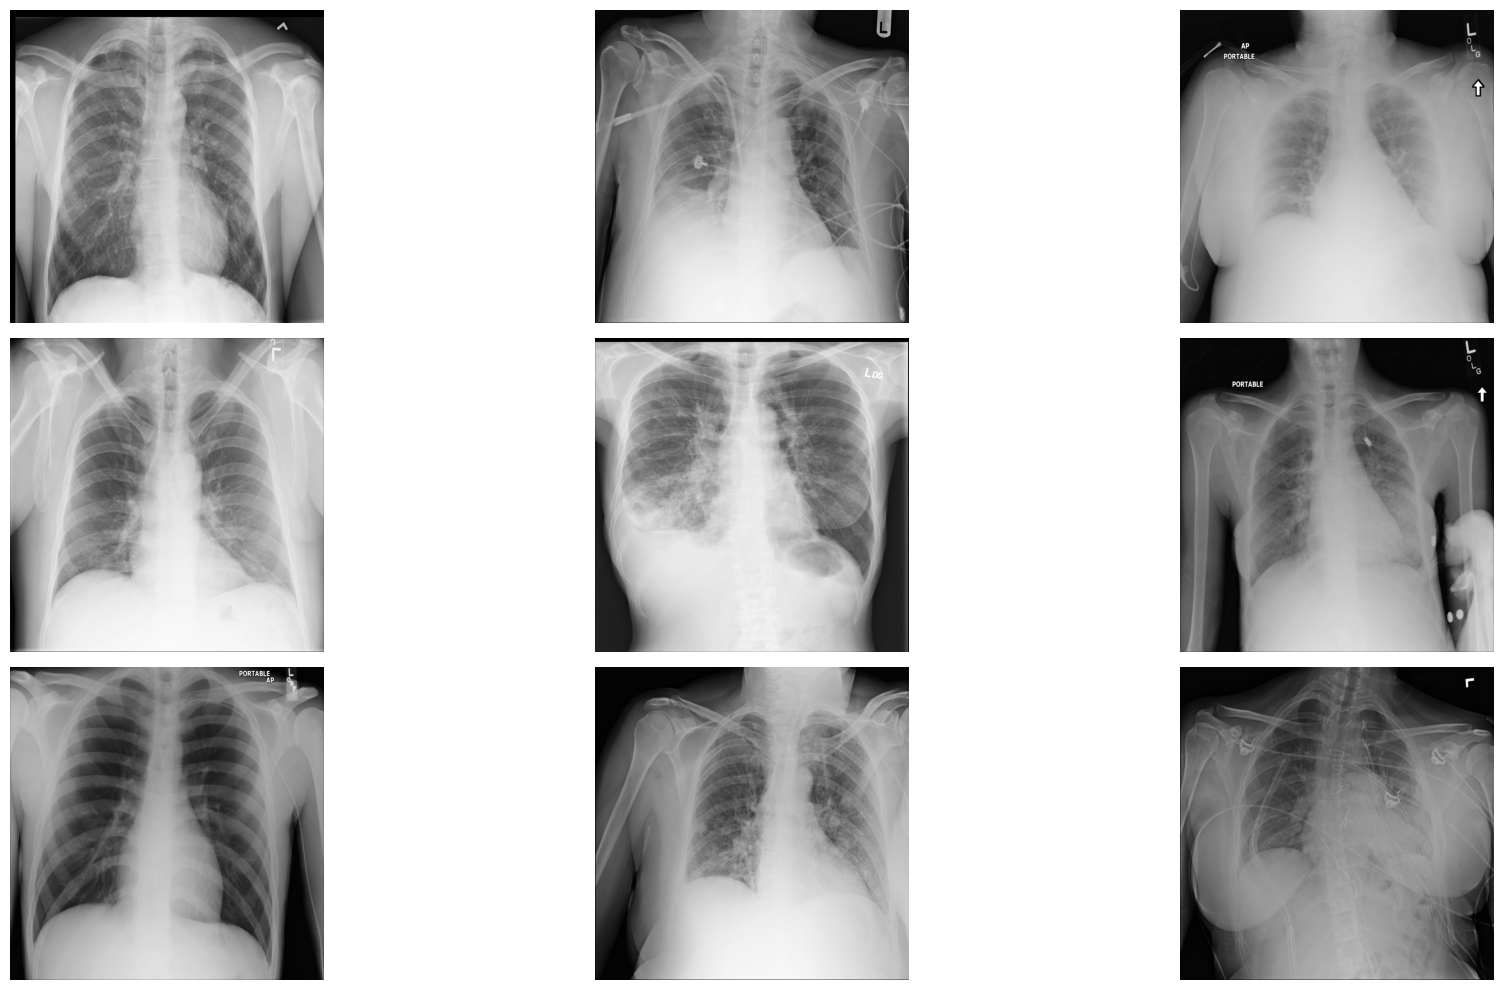

In [23]:
# visualize images


# Extract numpy values from Image column in data frame
images = train_df['Image'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = IMAGE_DIR

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    



The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9804 and the minimum is 0.0000
The mean value of the pixels is 0.4796 and the standard deviation is 0.2757


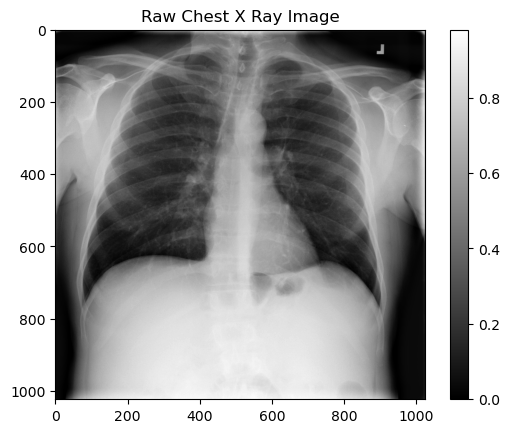

In [24]:
# visualize images
# Get the first image that was listed in the train_df dataframe
sample_img = train_df.Image[0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

/tmp/ipykernel_86271/3640531972.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

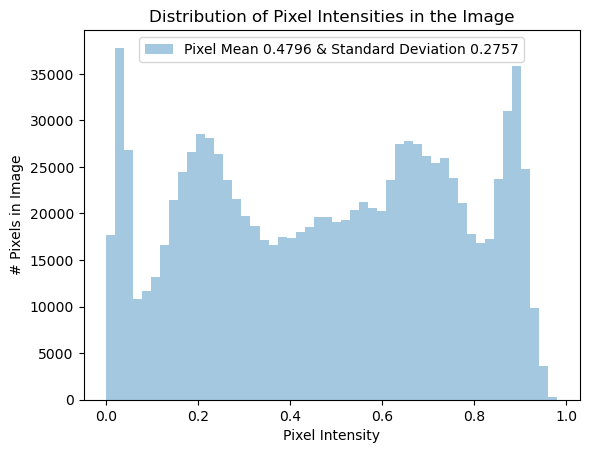

In [25]:
import seaborn as sns

# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')



In [ ]:
# understand pixel distro

In [28]:

# raw; for std CNN

def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
    # normalize images
    image_generator = ImageDataGenerator(
        rescale=1./255
    )
    
    # flow from directory with specified batch size
    # and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    return generator

In [29]:
train_generator = get_train_generator(train_df, IMAGE_DIR, "Image", labels)

Found 1000 validated image filenames.



Efficnet Net anmd Dense121

from tensorflow.keras.applications.efficientnet import preprocess_input

ImageDataGenerator(
    preprocessing_function=preprocess_input
)


---------

from tensorflow.keras.applications.densenet import preprocess_input

ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [30]:
from tensorflow.keras.applications.densenet import preprocess_input


def get_train_generator_dense121(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
    # normalize images
    image_generator = ImageDataGenerator(
        preprocessing_function=preprocess_input
    )
    
    # flow from directory with specified batch size
    # and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    return generator

train_generator_dense = get_train_generator_dense121(train_df, IMAGE_DIR, "Image", labels)

In [31]:
train_generator_dense = get_train_generator_dense121(train_df, IMAGE_DIR, "Image", labels)

Found 1000 validated image filenames.


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.4678 and the standard deviation is 0.2428


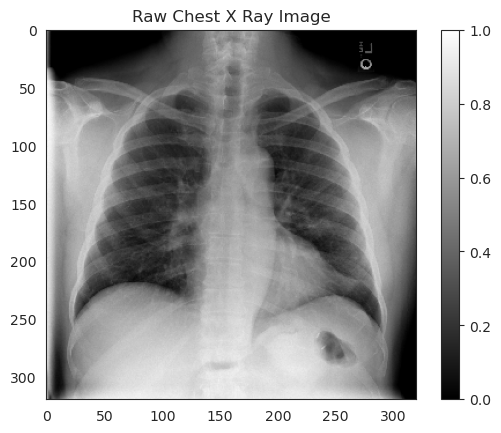

In [33]:


# Plot a processed image
sns.set_style("white")
generated_image, label = train_generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")



/tmp/ipykernel_86271/2438525894.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),
/tmp/ipykernel_86271/2438525894.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image[0].ravel(),


Text(0, 0.5, '# Pixel')

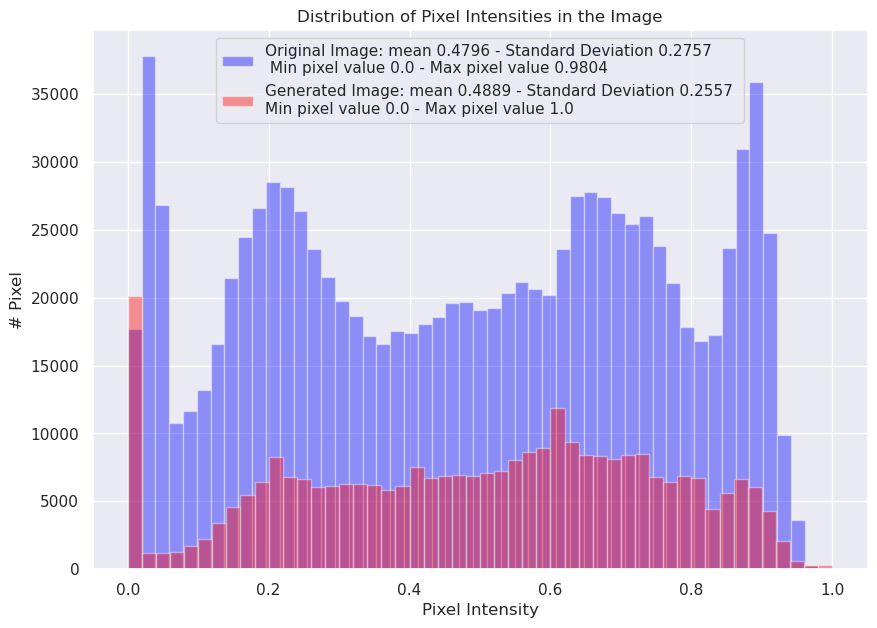

In [34]:


# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')



## Handling class imbalance

In [38]:
def compute_class_freqs(labels):
    """
    Compute positive and negative frequences for each class.

    Args:
        labels (np.array): matrix of labels, size (num_examples, num_classes)
    Returns:
        positive_frequencies (np.array): array of positive frequences for each
                                         class, size (num_classes)
        negative_frequencies (np.array): array of negative frequences for each
                                         class, size (num_classes)
    """    
    # total number of patients (rows)
    N = labels.shape[0]
    
    positive_frequencies = np.sum(labels, axis = 0) / N
    negative_frequencies = 1 - positive_frequencies

    return positive_frequencies, negative_frequencies

In [40]:
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)
freq_pos

array([0.106, 0.02 , 0.033, 0.016, 0.128, 0.013, 0.014, 0.002, 0.175,
       0.045, 0.054, 0.021, 0.01 , 0.038])

/tmp/ipykernel_86271/2978771470.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)], ignore_index=True)


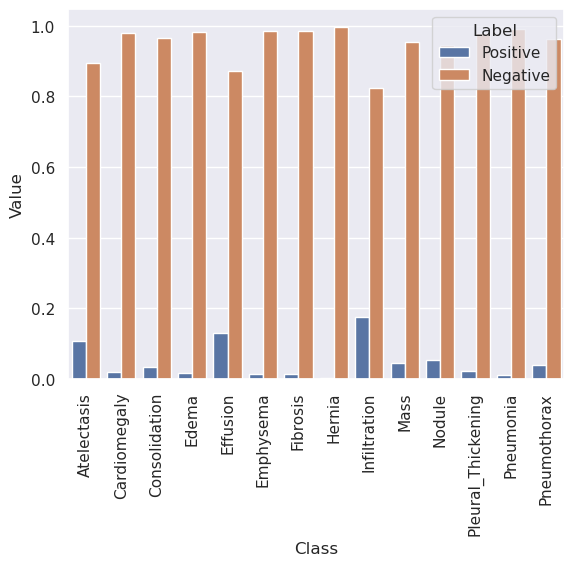

In [41]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": freq_pos})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)], ignore_index=True)
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

In [42]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights 
neg_contribution = freq_neg * neg_weights

/tmp/ipykernel_86271/4211278599.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v}


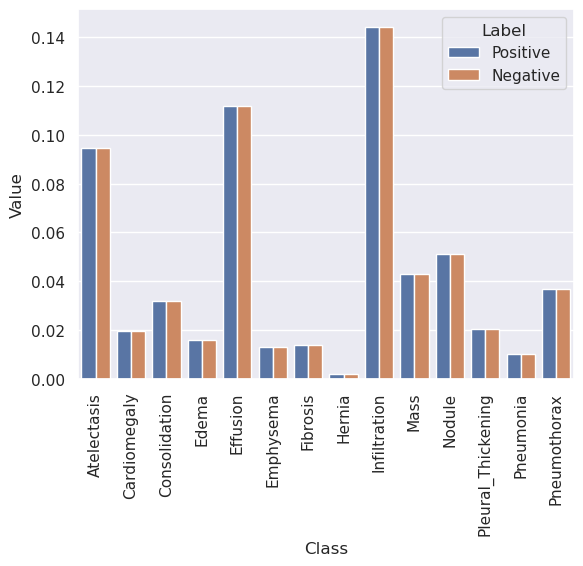

In [43]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": pos_contribution})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} 
                        for l,v in enumerate(neg_contribution)], ignore_index=True)
plt.xticks(rotation=90)
sns.barplot(x="Class", y="Value", hue="Label" ,data=data);

## Weighted loss

In [44]:
loss_fn = tf.keras.losses.BinaryCrossentropy(
    from_logits=True,
    reduction=tf.keras.losses.Reduction.NONE,
)

def weighted_bce(y_true, logits):
    unweighted = tf.nn.weighted_cross_entropy_with_logits(
        labels=y_true,
        logits=logits,
        pos_weight=pos_weight,
    )
    return tf.reduce_mean(unweighted)

In [45]:
"""
“Due to severe class imbalance, I trained the model using a weighted binary cross-entropy loss with logits, where class weights were derived from empirical label frequenci
"""

'\n“Due to severe class imbalance, I trained the model using a weighted binary cross-entropy loss with logits, where class weights were derived from empirical label frequenci\n'

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_simple_cnn(input_shape=(320, 320, 3), num_classes=14):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes)(x)  # LOGITS (no sigmoid)

    model = models.Model(inputs, outputs, name="simple_cnn_baseline")
    return model


In [49]:
def weighted_bce_loss(pos_weights):
    def loss(y_true, logits):
        loss = tf.nn.weighted_cross_entropy_with_logits(
            labels=y_true,
            logits=logits,
            pos_weight=pos_weights
        )
        return tf.reduce_mean(loss)
    return loss


In [50]:
model = build_simple_cnn()

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=weighted_bce_loss(pos_weights),
    metrics=[
        tf.keras.metrics.AUC(curve="ROC", multi_label=True, name="auroc"),
        tf.keras.metrics.AUC(curve="PR", multi_label=True, name="auprc"),
    ]
)

model.summary()


Model: "simple_cnn_baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 320, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 320, 320, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 320, 320, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 320, 320, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 160, 160, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 160, 160, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 160, 160, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 80, 80, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 80, 80, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 80, 80, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,462 (439.30 KB)

 Trainable params: 112,014 (437.55 KB)

 Non-trainable params: 448 (1.75 KB)

In [52]:
val_generator = get_train_generator(train_df, IMAGE_DIR, "Image", labels) # then change shuffle

Found 1000 validated image filenames.


In [53]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=1,
    steps_per_epoch=100,
    validation_steps=25
)


2026-01-13 18:05:31.317618: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 104857600 exceeds 10% of free system memory.
2026-01-13 18:05:31.524323: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 104857600 exceeds 10% of free system memory.
2026-01-13 18:05:31.842629: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 104857600 exceeds 10% of free system memory.
2026-01-13 18:05:31.928347: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 52428800 exceeds 10% of free system memory.
2026-01-13 18:05:31.972831: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 52428800 exceeds 10% of free system memory.


100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - auprc: 0.0454 - auroc: 0.4912 - loss: 0.5696 - val_auprc: 0.0435 - val_auroc: 0.4588 - val_loss: 0.5132


In [54]:
x_batch, y_batch = next(train_generator)

print(x_batch.shape)  # (batch_size, H, W, 3)
print(y_batch.shape)  # (batch_size, 14)


(8, 320, 320, 3)
(8, 14)


In [55]:
logits = model.predict(x_batch)        # shape (N, 14)
probs = tf.sigmoid(logits).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


In [62]:
logits.shape, probs.shape

(TensorShape([8, 14]), TensorShape([8, 14]))


1 pred for the pos class; neg = 1- pos

each output neuron models only the positive class probability.


Why the shape is (batch_size, 14)

You are doing multi-label binary classification.

For each class, the model predicts:

P(class = 1 | image)

That’s it.

So:

14 diseases

1 probability per disease

Output shape → (batch_size, 14)

There is no second column for “negative”

In [63]:
probs[0]

<tf.Tensor: shape=(14,), dtype=float32, numpy=
array([0.3559394 , 0.3676456 , 0.27630204, 0.27163708, 0.43815774,
       0.417968  , 0.39453155, 0.308069  , 0.5256638 , 0.43184596,
       0.36954126, 0.47335887, 0.3931201 , 0.40068996], dtype=float32)>

## Efficient Net

In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input


In [67]:
# generators
#from tensorflow.keras.applications.densenet import preprocess_input


def get_train_generator_eff(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
    # normalize images
    image_generator = ImageDataGenerator(
        preprocessing_function=preprocess_input
    )
    
    # flow from directory with specified batch size
    # and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    return generator

train_generator = get_train_generator_eff(train_df, IMAGE_DIR, "Image", labels, True)
val_generator = get_train_generator_eff(val_df, IMAGE_DIR, "Image", labels, False)

Found 1000 validated image filenames.
Found 200 validated image filenames.


In [68]:
def build_efficientnet(
    input_shape=(320, 320, 3),
    num_classes=14,
    train_backbone=False
):
    backbone = EfficientNetB0(
        include_top=False,
        weights="imagenet",
        input_shape=input_shape
    )

    backbone.trainable = train_backbone

    inputs = layers.Input(shape=input_shape)
    #x = preprocess_input(inputs); see later
    x = inputs

    x = backbone(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes)(x)  # LOGITS

    model = models.Model(inputs, outputs, name="efficientnet_b0")
    return model


"""
preprocess_input is inside the model → safer for inference

training=False when frozen (important!)

No sigmoid
"""

'\npreprocess_input is inside the model → safer for inference\n\ntraining=False when frozen (important!)\n\nNo sigmoid\n'

In [69]:
model = build_efficientnet(train_backbone=False)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=weighted_bce_loss(pos_weights),
    metrics=[
        tf.keras.metrics.AUC(curve="ROC", multi_label=True, name="auroc"),
        tf.keras.metrics.AUC(curve="PR", multi_label=True, name="auprc"),
    ]
)

model.summary()


Model: "efficientnet_b0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 320, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 10, 10, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,386,225 (16.73 MB)

 Trainable params: 334,094 (1.27 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [71]:
# feature extractor
history_frozen = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=1,
    steps_per_epoch=100,
    validation_steps=25
)


100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 683ms/step - auprc: 0.0503 - auroc: 0.5080 - loss: 0.7901 - val_auprc: 0.1625 - val_auroc: 0.5824 - val_loss: 0.5249


In [72]:
# unfreeze and fine-tune
backbone = model.get_layer("efficientnetb0")

for layer in backbone.layers[-30:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss=weighted_bce_loss(pos_weights),
    metrics=[
        tf.keras.metrics.AUC(curve="ROC", multi_label=True, name="auroc"),
        tf.keras.metrics.AUC(curve="PR", multi_label=True, name="auprc"),
    ]
)


In [73]:
history_ft = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2,
    steps_per_epoch=100,
    validation_steps=25
)


Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 893ms/step - auprc: 0.0530 - auroc: 0.5091 - loss: 0.6101 - val_auprc: 0.1025 - val_auroc: 0.5854 - val_loss: 0.4978
Epoch 2/2
 25/100 ━━━━━━━━━━━━━━━━━━━━ 53s 709ms/step - auprc: 0.0687 - auroc: 0.4303 - loss: 0.5844

/home/marcos/.local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 313ms/step - auprc: 0.0504 - auroc: 0.4906 - loss: 0.5801 - val_auprc: 0.0936 - val_auroc: 0.5853 - val_loss: 0.4836


In [75]:
history_ft.history

{'auprc': [0.053029753267765045, 0.05035373941063881],
 'auroc': [0.5090724229812622, 0.490608274936676],
 'loss': [0.610129714012146, 0.5801177024841309],
 'val_auprc': [0.10248732566833496, 0.09359478205442429],
 'val_auroc': [0.5854498744010925, 0.5852710008621216],
 'val_loss': [0.49783095717430115, 0.4835553467273712]}

## Dense121

In [76]:
# generators
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_dense121


def get_train_generator_dense(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
    # normalize images
    image_generator = ImageDataGenerator(
        preprocessing_function=preprocess_dense121
    )
    
    # flow from directory with specified batch size
    # and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    return generator

train_generator = get_train_generator_dense(train_df, IMAGE_DIR, "Image", labels, True)
val_generator = get_train_generator_dense(val_df, IMAGE_DIR, "Image", labels, False)

Found 1000 validated image filenames.
Found 200 validated image filenames.


In [79]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [80]:
def create_model():
    # create the base pre-trained model
    #base_model = DenseNet121(weights='./nih/densenet.hdf5', include_top=False)
    base_model = DenseNet121(include_top=False)

    x = base_model.output

    # add a global spatial average pooling layer
    x = GlobalAveragePooling2D()(x)

    # and a logistic layer
    # len(labels)
    predictions = Dense(14, activation=None)(x) # before: sigmoid, with the other loss

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss=weighted_bce_loss(pos_weights))

    return model

In [81]:
model = create_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, None,      │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,408 │ zero_padding2d[0… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, None,      │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, None,      │          0 │ conv2_block1_0_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, None,      │          0 │ pool1[0][0],      │
│ (Concatenate)       │ None, 96)         │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, None,      │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, None,      │          0 │ conv2_block2_0_b… │
│ (Activation)        │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, None,      │     12,288 │ conv2_block2_0_r

 Total params: 7,051,854 (26.90 MB)

 Trainable params: 6,968,206 (26.58 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [82]:
history = model.fit(train_generator, 
      validation_data=val_generator,
      steps_per_epoch=100, 
      validation_steps=25, 
      epochs = 1)

NameError: name 'valid_generator' is not defined

In [36]:
"""
import tensorflow as tf

loss_fn = tf.keras.losses.BinaryCrossentropy(
    from_logits=True,
    reduction=tf.keras.losses.Reduction.NONE,
)

def weighted_bce(y_true, logits):
    unweighted = tf.nn.weighted_cross_entropy_with_logits(
        labels=y_true,
        logits=logits,
        pos_weight=pos_weight,
    )
    return tf.reduce_mean(unweighted)


to use without signoid
"""

'\nimport tensorflow as tf\n\nloss_fn = tf.keras.losses.BinaryCrossentropy(\n    from_logits=True,\n    reduction=tf.keras.losses.Reduction.NONE,\n)\n\ndef weighted_bce(y_true, logits):\n    unweighted = tf.nn.weighted_cross_entropy_with_logits(\n        labels=y_true,\n        logits=logits,\n        pos_weight=pos_weight,\n    )\n    return tf.reduce_mean(unweighted)\n\n\nto use without signoid\n'